# CSCI 5922 (Spring 2020) Final Project
name: Timothy Mason
***
Music Genre classification using a CRNN as described in the paper blah, blah, blah...

todo: fill in citations and flesh out overview

In [1]:
import os
import numpy as np
import pandas as pd
import hdf5_getters
from tqdm.notebook import tqdm      # for easy and attractive progress bars

def get_file_list( msd_path='./MillionSongSubset/data' ):
    """
    Walk the directory structure of the provided path, and return a list of the paths to
    all *.h5 files

    Parameters
    ----------
    msd_path: The path to the root directory of the MSD dataset

    Returns
    -------
    a list of path strings to each file in the MSD data set
    """
    file_list = []

    for root, dirs, files in os.walk(msd_path):
        for f in files:
            if f[-3:] == ".h5":
                file_list.append(os.path.join(root,f))

    return file_list

def get_data( categories=("song_id", "track_id", "artist_name", "release", "title", "year",
                          "analysis_sample_rate", "duration", "tempo", "beats_start",
                          "bars_start", "segments_start", "segments_pitches", "segments_timbre",
                          "tatums_start"),
              msd_path='./MillionSongSubset/data',
              first = 0, last = None):
    """
    Walk the directory structure of the provided path, and read data from the
    *.h5 files in all subdirectories.

    Parameters
    ----------
    categories: list of Strings
        a list of keyword strings
    msd_path: The path to the root directory of the MSD dataset
    first: Index of the first file to read
    last: Index of the last file to read.  If None, then read entire list of files

    Returns
    -------
    a Pandas dataframe object containing the specified categories of MSD data
    """

    print(f"Reading categories {categories} from {msd_path}/...")
    file_list = get_file_list(msd_path)

    if last == None:
        last = len(file_list)
    data = []

    for f in tqdm(file_list[first:last], desc=f"Reading files {first+1:,} through {last:,}"):
        h5file = hdf5_getters.open_h5_file_read(f)
        d = {}
        for c in categories:
            t = getattr(hdf5_getters, "get_"+c)(h5file)
            d[c] = t
        h5file.close()
        data.append(d)
    df = pd.DataFrame(data)
    return df

msd_df = get_data(last=20)
# msd_df = get_data()
print("Columns read:")
for c in msd_df.columns:
    print(f"    {c}")

Reading categories ('song_id', 'track_id', 'artist_name', 'release', 'title', 'year', 'analysis_sample_rate', 'duration', 'tempo', 'beats_start', 'bars_start', 'segments_start', 'segments_pitches', 'segments_timbre', 'tatums_start') from ./MillionSongSubset/data/...



Columns read:
    song_id
    track_id
    artist_name
    release
    title
    year
    analysis_sample_rate
    duration
    tempo
    beats_start
    bars_start
    segments_start
    segments_pitches
    segments_timbre
    tatums_start


###  0: "Je Sais Que La Terre Est Plate" by *Raphaël* on *Je Sais Que La Terre Est Plate (Deluxe)*, released 2008

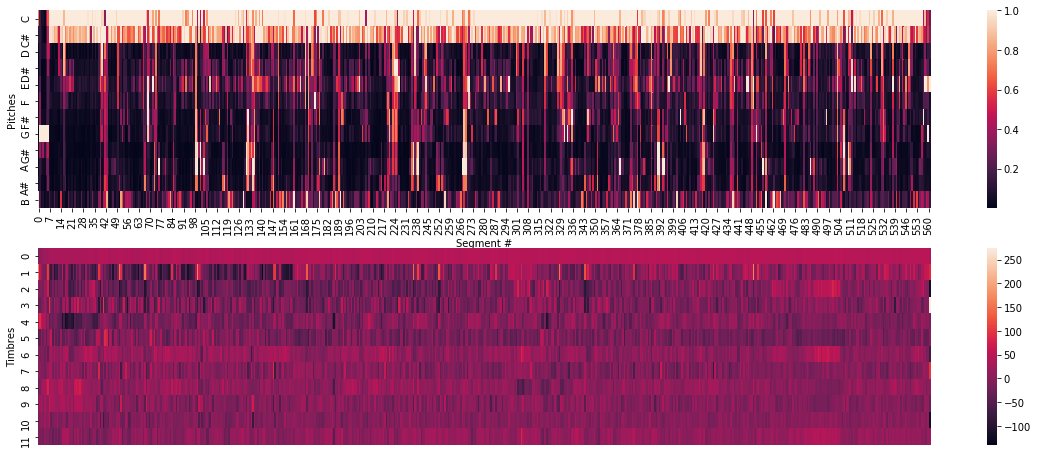

###  1: "On Efface" by *Julie Zenatti* on *Comme Vous*, released 2004

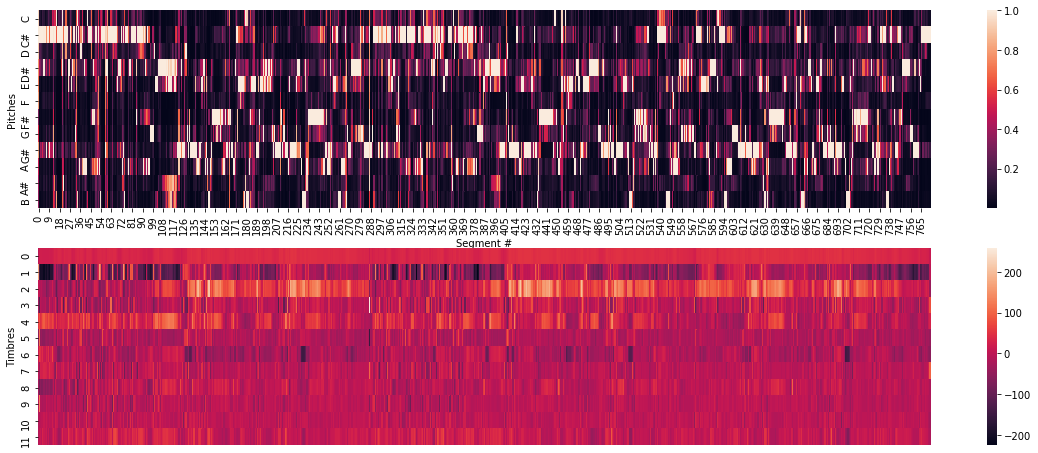

###  2: "Howells Delight" by *The Baltimore Consort* on *Watkins Ale -  Music of the English Renaissance*

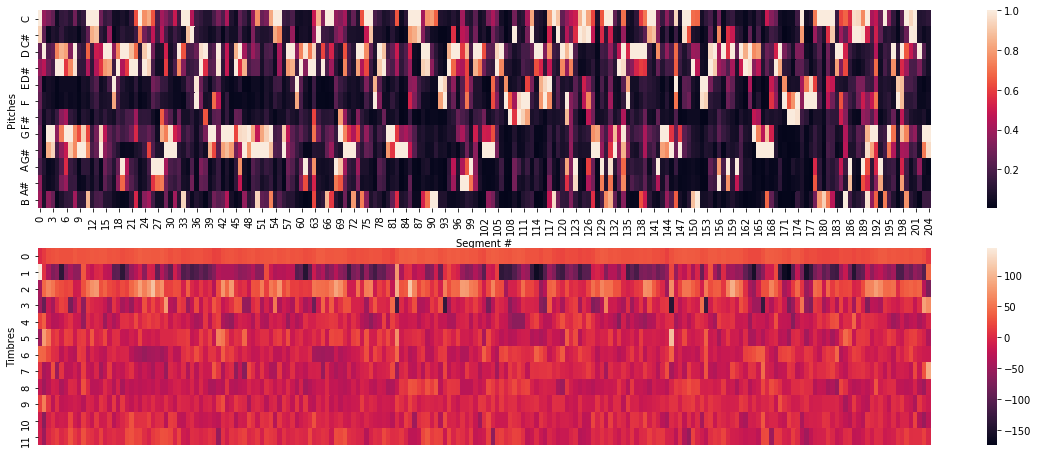

###  3: "Martha Served" by *I Hate Sally* on *Don't Worry Lady*, released 2007

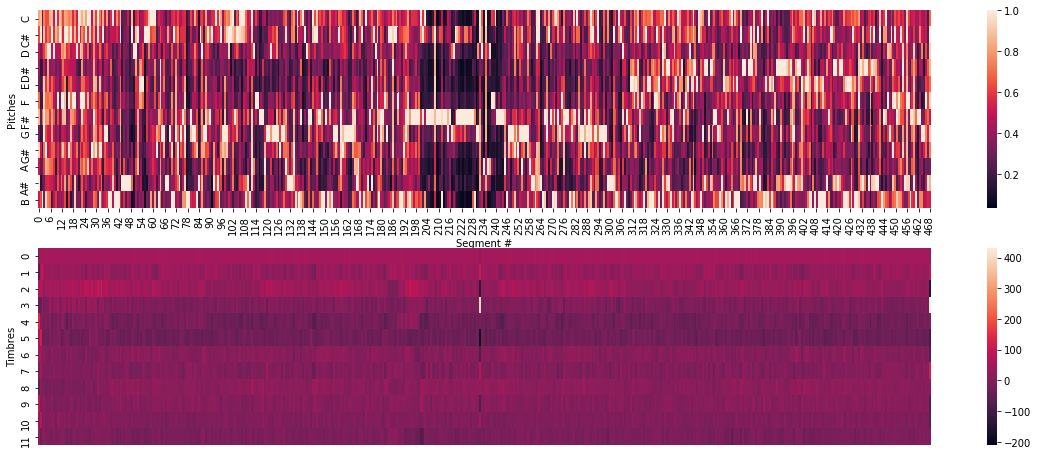

###  4: "Zip-A-Dee-Doo-Dah (Song of the South)" by *Orlando Pops Orchestra* on *Easy Listening: Cartoon Songs*

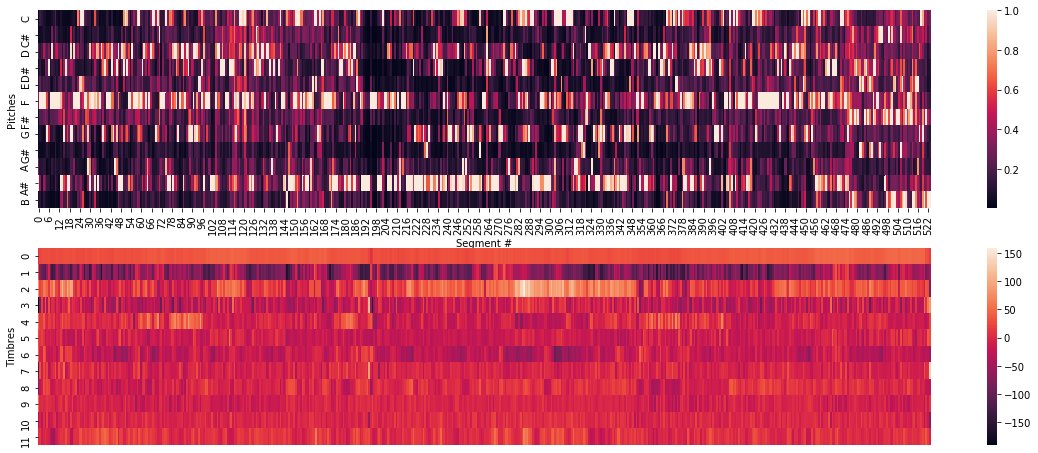

###  5: "Liquid Time (composition by John Goodsall)" by *Brand X* on *X Communication : Trilogy II*

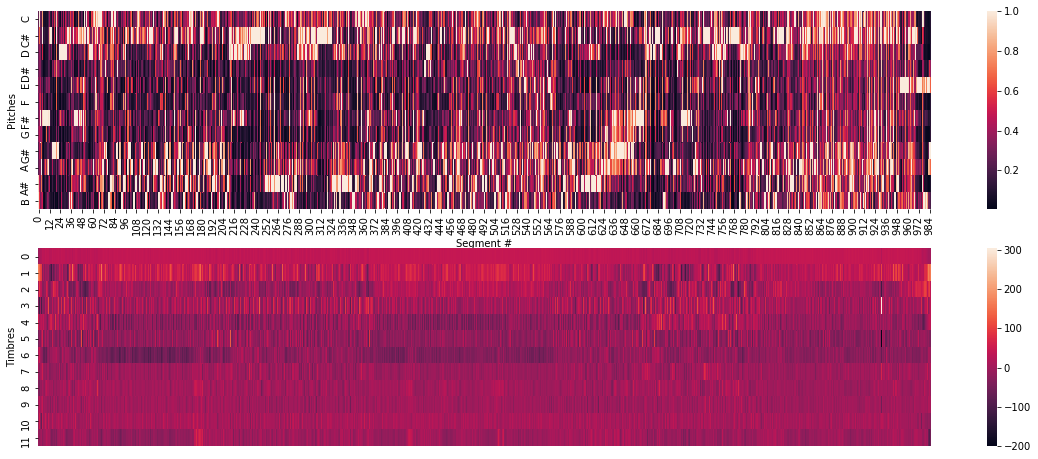

###  6: "Misery Path (From the Privilege of Evil)" by *Amorphis* on *Karelian Isthmus*

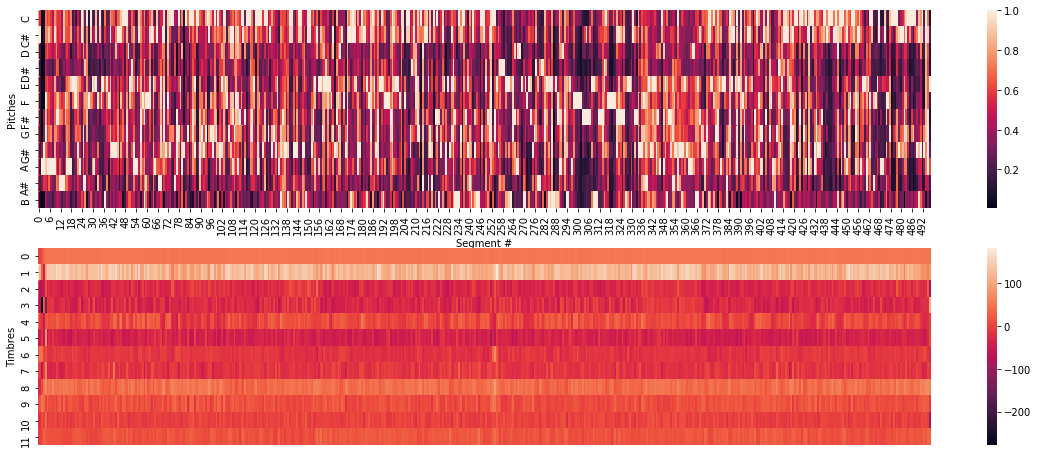

###  7: "Nuovi Re pt. I I (feat. Tek money - Lady Tambler)" by *Inoki* on *Nobiltà di strada*

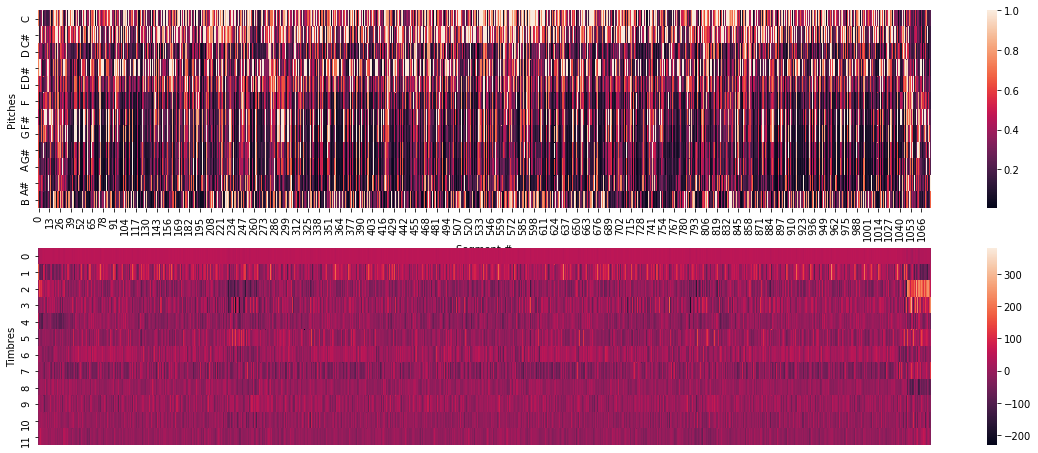

###  8: "Halloween" by *Dead Kennedys* on *Milking The Sacred Cow*, released 1982

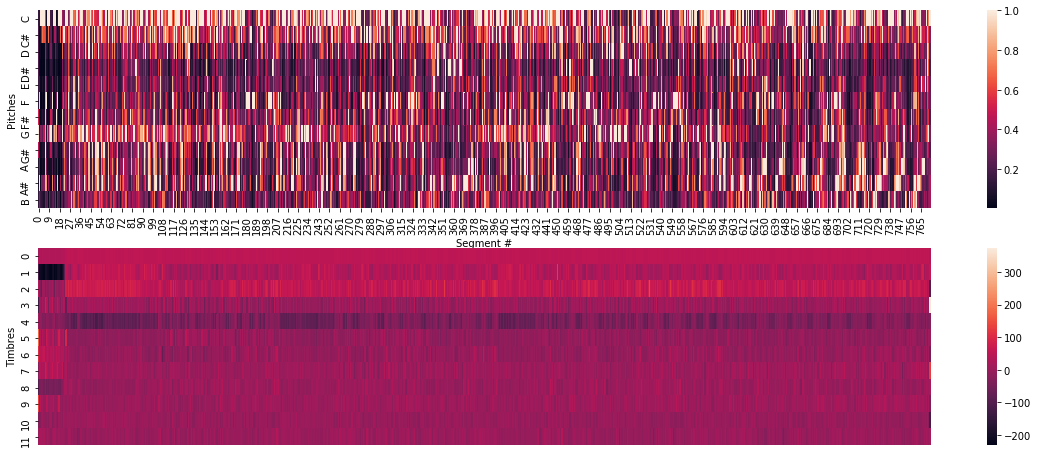

###  9: "Parto em terras distantes" by *Brigada Victor Jara* on *Novas Vos Trago*, released 1998

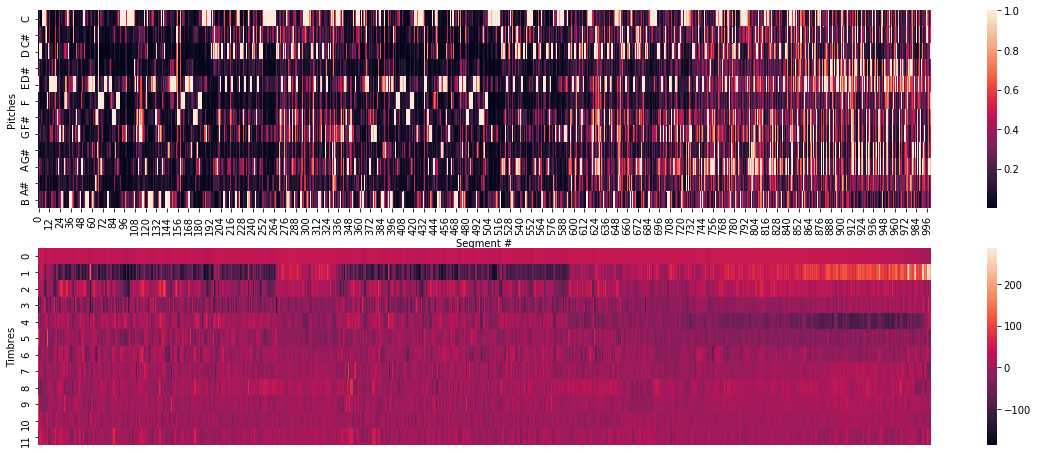

### 10: "You Eclipsed By Me (Album Version)" by *Atreyu* on *The Curse*, released 2004

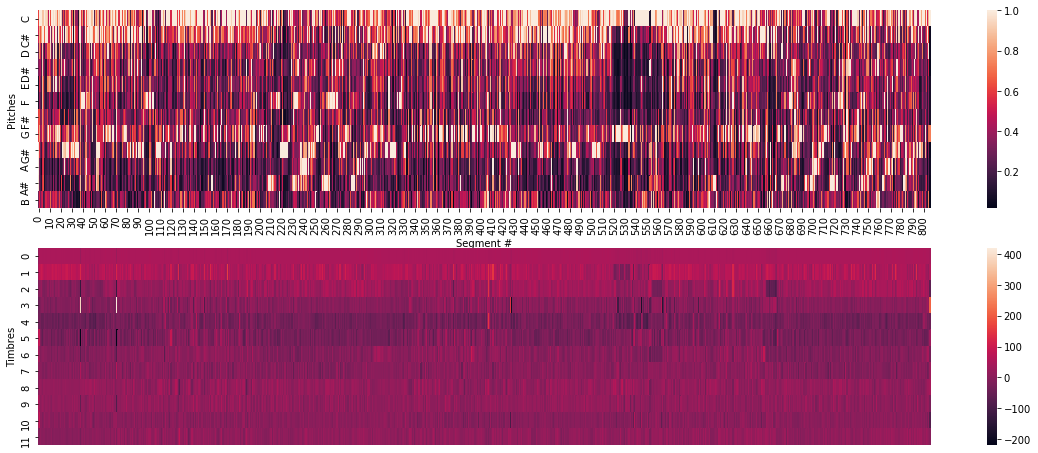

### 11: "Shovel" by *Mistress* on *In Disgust We Trust*, released 2005

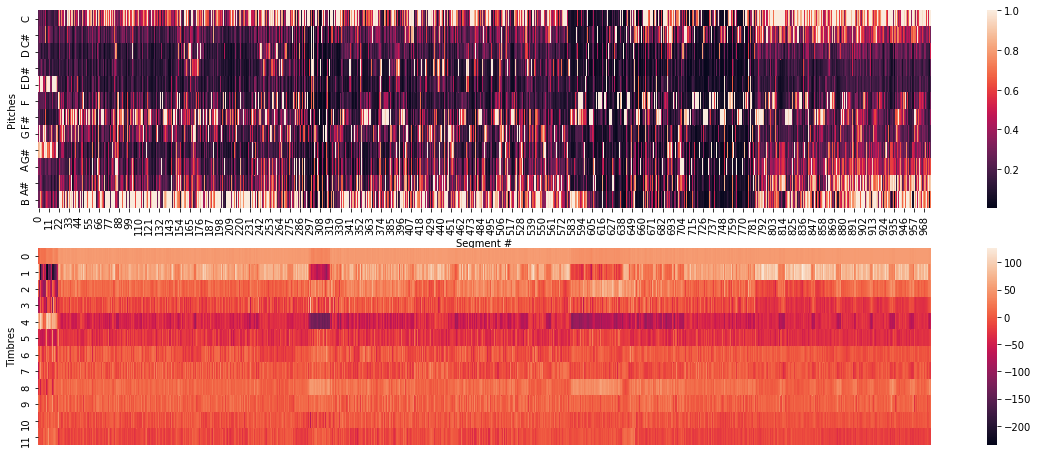

### 12: "What Drives The Weak" by *Shadows Fall* on *The War Within*, released 2004

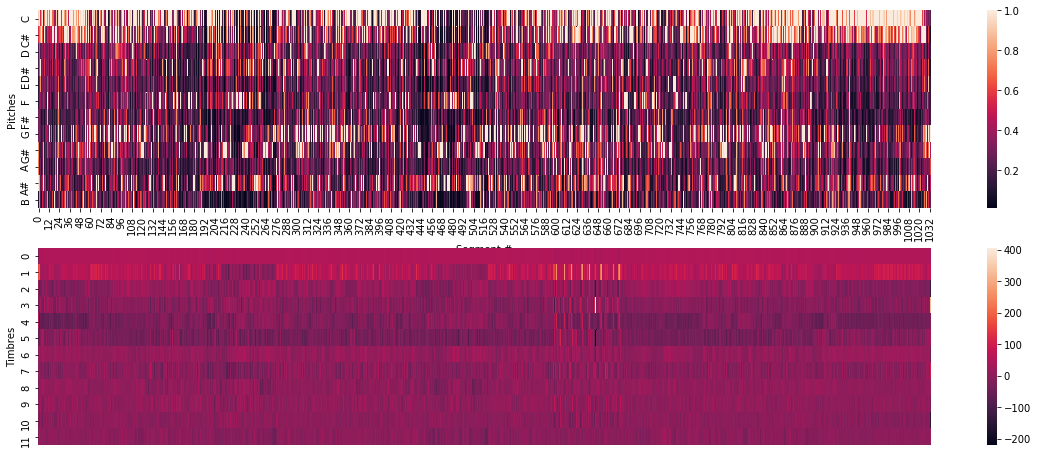

### 13: "Life Force" by *Vanessa Daou* on *Joe Sent Me*

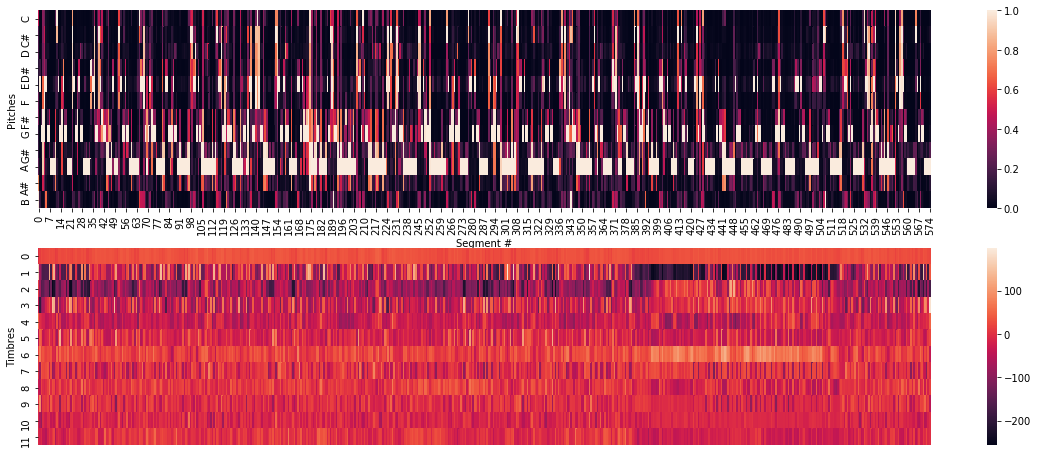

### 14: "The Dance Of Europe" by *Dave Brockie Experience* on *Diarrhea Of A Madman*, released 2001

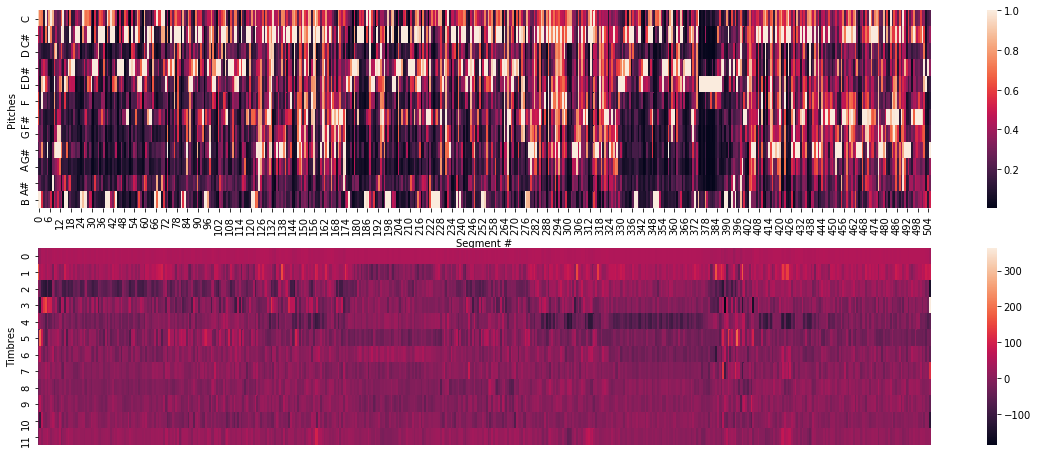

### 15: "Spoonie Is Back" by *Spoonie Gee* on *The Sugar Hill Records Story*

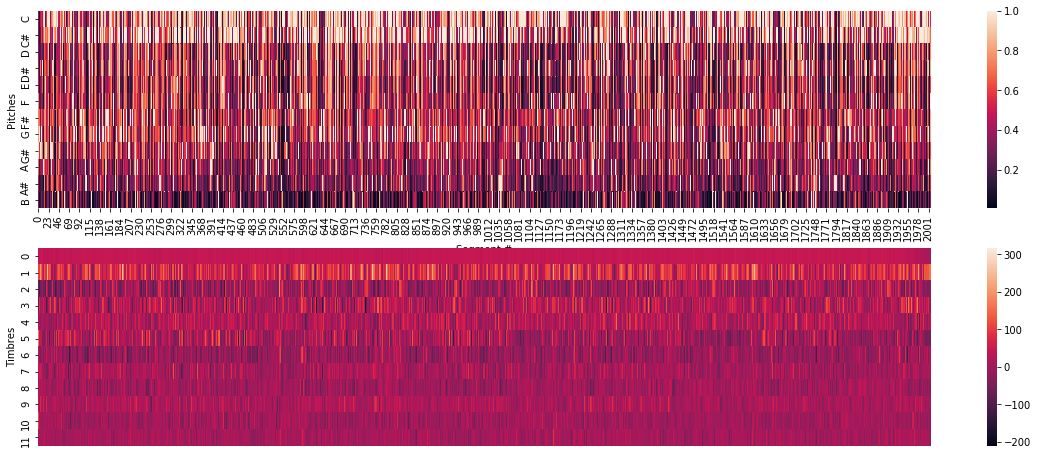

### 16: "Blood Round Dance Song (World)" by *R. Carlos Nakai* on *Changes*, released 1982

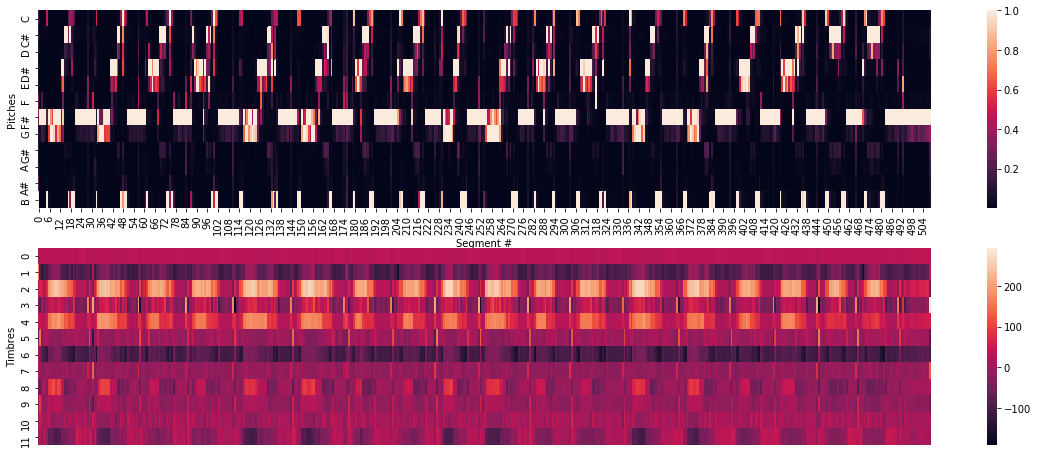

### 17: "Crawling (Album Version)" by *Linkin Park* on *Hybrid Theory*, released 2000

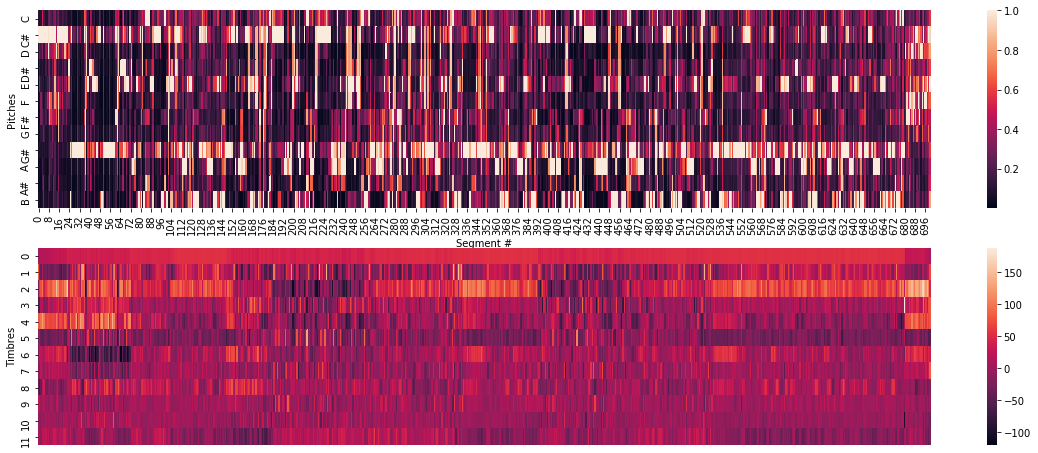

### 18: "Bennie" by *Koffi Olomidé* on *Les incontournables du Congo*

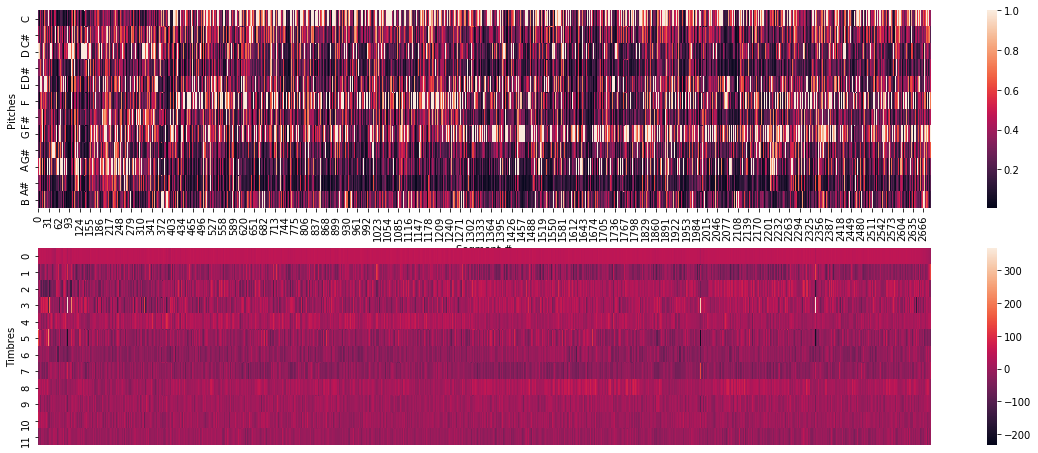

### 19: "Playa del sous-sol" by *Alain-François* on *Vivant*

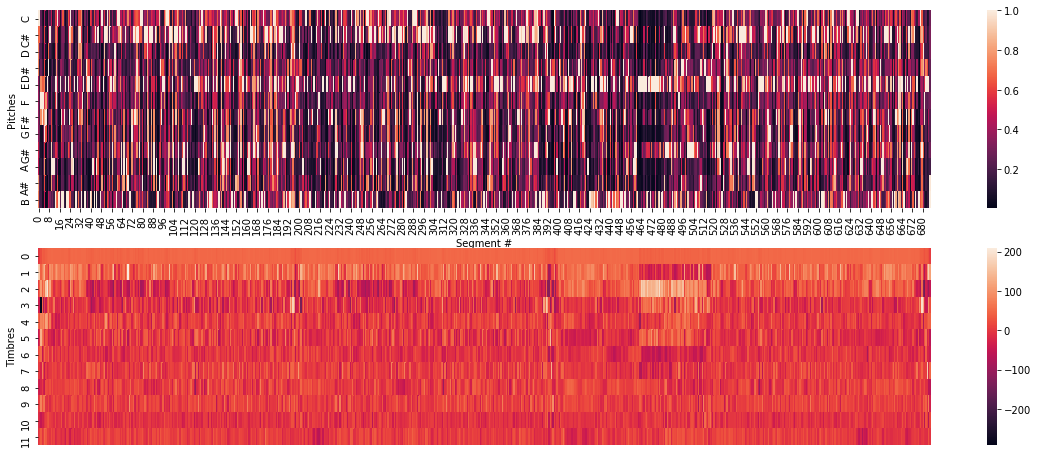

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

%matplotlib inline

for i in tqdm(msd_df.index, desc="Plotting Pitch and Timbre heatmaps"):
    name = f'### {i:2}: "{msd_df.title[i]}" by *{msd_df.artist_name[i]}* on *{msd_df.release[i]}*'
    if msd_df.year[i] != 0:
        name += f', released {msd_df.year[i]}'
    display(Markdown(name))
    
    # plot a scatterplot of the segment starts
    plt.figure(figsize=(20,8))

    # plot a heatmap of the pitch data
    plt.subplot(2,1,1)
    ax = sns.heatmap(msd_df.segments_pitches[i].T, 
                     yticklabels=("C", "C#", "D", "D#", "E", "F", "F#", "G",
                                 "G#", "A", "A#", "B"))
    ax.set(ylabel="Pitches")
    ax.set(xlabel="Segment #")

    # plot a heatmap of the timbre data
    plt.subplot(2,1,2)
    ax = sns.heatmap(msd_df.segments_timbre[i].T, xticklabels=False)
    ax.set(ylabel="Timbres")
    plt.show()
    plt.close()
    

In [ ]:

xticklabels